In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score, recall_score, balanced_accuracy_score, roc_curve
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

# Reading, Preprocessing and EDA

In [3]:
Train_path = "../datasets/cencus_income/census-income.data"
Test_path = "../datasets/cencus_income/census-income.test"
train_df = pd.read_csv(Train_path, header = None)
test_df = pd.read_csv(Test_path, header = None)

In [4]:
print(train_df.shape, test_df.shape)

(199523, 42) (99762, 42)


This is our target variable. The income.

In [5]:
print(train_df[41].value_counts(), test_df[41].value_counts())

 - 50000.    187141
 50000+.      12382
Name: 41, dtype: int64  - 50000.    93576
 50000+.      6186
Name: 41, dtype: int64


In [6]:
print(train_df.isnull().sum().sum(), test_df.isna().sum().sum())

0 0


It has null values, stored as '?' and has categorical columns too.

In [7]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))

list_dtype = [test_df[i].dtype for i in test_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('int64'): 12, dtype('O'): 29, dtype('float64'): 1}
{dtype('int64'): 12, dtype('O'): 29, dtype('float64'): 1}


In [8]:
ch = train_df.iloc[11][32]
print(ch)
train_df = train_df.replace(ch, np.NaN)
test_df = test_df.replace(ch, np.NaN)

 ?


In [9]:
null = train_df.isnull().sum()
for i in range(len(null)):
    if null[i] > 0:
        print(i, null[i])

null = test_df.isnull().sum()
for i in range(len(null)):
    if null[i] > 0:
        print(i, null[i])

21 708
25 99696
26 99696
27 99696
29 99696
32 6713
33 6119
34 3393
21 330
25 49946
26 49946
27 49946
29 49946
32 3429
33 3072
34 1764


In [10]:
train_df = train_df.drop({25, 26, 27, 29}, axis = 1)
test_df = test_df.drop({25, 26, 27, 29}, axis = 1)

In [11]:
null = train_df.isnull().sum()
for i in null:
    if i > 0:
        print(i)
null = test_df.isnull().sum()
for i in null:
    if i > 0:
        print(i)

708
6713
6119
3393
330
3429
3072
1764


In [12]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('int64'): 12, dtype('O'): 25, dtype('float64'): 1}


In [13]:
for col in train_df.columns:
    if 'int' in train_df[col] or 'float' in train_df[col]:
        train_df[col] = train_df[col].fillna(train_df[col].mean())
        test_df[col] = test_df[col].fillna(train_df[col].mean())
    else:
        mode_val = train_df[col].mode()[0]
        train_df[col] = train_df[col].fillna(mode_val)
        test_df[col] = test_df[col].fillna(mode_val)

In [14]:
null = train_df.isnull().sum()
for i in null:
    if i > 0:
        print(i)

null = test_df.isnull().sum()
for i in null:
    if i > 0:
        print(i)

All missing values handled

In [15]:
print(train_df[41].value_counts(), test_df[41].value_counts())

 - 50000.    187141
 50000+.      12382
Name: 41, dtype: int64  - 50000.    93576
 50000+.      6186
Name: 41, dtype: int64


In [16]:
label_encoder = LabelEncoder()
i = 41
train_df[i] = label_encoder.fit_transform(train_df[i])    
test_df[i] = label_encoder.transform(test_df[i])

In [17]:
combined_df = pd.concat([train_df, test_df])
combined_df = pd.get_dummies(combined_df)
print(combined_df[i].value_counts())
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]

0    280717
1     18568
Name: 41, dtype: int64


In [18]:
print(train_df[i].value_counts())
print(test_df[i].value_counts())

0    187141
1     12382
Name: 41, dtype: int64
0    93576
1     6186
Name: 41, dtype: int64


In [19]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(train_df)
scl.transform(train_df)
scl.transform(test_df)
y_train = train_df[41]
y_test = test_df[41]
X_train = train_df.drop([41], axis = 1)
X_test = test_df.drop([41], axis = 1)

/home/r5975x/anaconda3/envs/knn_class_imbalance/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/r5975x/anaconda3/envs/knn_class_imbalance/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/r5975x/anaconda3/envs/knn_class_imbalance/lib/python3.8/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [20]:
class CentroidSMOTE():
    def __init__(self, sampling_strategy='auto', random_state=42, k_neighbors=5, m_vertices=3):
        self.sampling_strategy = sampling_strategy
        self.random_state = random_state
        self.k_neighbors = k_neighbors
        self.m_vertices = m_vertices
    
    @staticmethod
    def nearest_neighbor(X, k):
        from sklearn.neighbors import NearestNeighbors
        nbs=NearestNeighbors(n_neighbors=k+1,metric='euclidean',algorithm='kd_tree').fit(X)
        euclidean,indices= nbs.kneighbors(X)
        return indices[:, 1:]
    
    def fit_resample(self, X, y):
        
        (unique, freq) = np.unique(y, return_counts=True)
        frequency = dict(zip(unique, freq))
        max_frequency = max(frequency.values())
        
        if self.sampling_strategy == 'auto':
            sampling_strategy = {}
            for (key, value) in frequency.items():
                sampling_strategy[key] = max_frequency - value
            self.sampling_strategy = sampling_strategy
            
        data = {}
        for (key, value) in self.sampling_strategy.items():
            if value == 0:
                continue
            X_small = X[y == key]
            indices = self.nearest_neighbor(X_small, self.k_neighbors)
            new_data = []
            for idx in np.random.choice(np.arange(len(X_small)), size=value):
                p = X_small[idx]
                nnarray = indices[idx]
                q = X_small[np.random.choice(nnarray, size=self.m_vertices-1, replace=False)]
                new_data.append(np.sum(np.vstack([p, q]), axis=0)/self.m_vertices)
            X_new = np.vstack(new_data)
            data[key] = X_new
        
        for (key, value) in data.items():
            X = np.vstack([X, value])
            y = np.concatenate([y, np.ones(len(value))*key])
        
        X, y = shuffle(X, y, random_state=self.random_state)
        
        return X, y        

In [21]:
def score(X_test, y_test, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.6f}")
    print(f"Error Rate: {1-acc}")
    Recall = recall_score(y_test, y_pred, average='macro')      
    print(f"Mean Recall: {Recall}")
    print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred)}")
    Array_prec_recall_f = precision_recall_fscore_support(y_test, y_pred, average='macro')
#                                                                         average = 'micro', 'macro', 'weighted'
    print(f"Precision: {Array_prec_recall_f[0]}")
    print(f"F-Score: {Array_prec_recall_f[2]}")
          
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    print(len(y_pred), len(y_test))
    for i in range(len(y_pred)): 
        if y_test[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_test[i]!=y_pred[i]:
           FP += 1
        if y_test[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    if TN + FP == 0: 
      Selectivity = 0
    else:
      Selectivity = TN/(TN + FP)
    G_mean = np.sqrt(Selectivity*Recall) 
    print(f"Selectivity: {Selectivity}") 
    print(f"G_mean: {G_mean}")   
    
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
   
        

In [22]:
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(metric='euclidean'))
])

parameters = {
    'classifier__n_neighbors' : [3, 5, 7, 9, 11],
}

In [23]:
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.944528
Error Rate: 0.05547202341572943
Mean Recall: 0.6169368900246915
Balanced Accuracy Score: 0.6169368900246915
Precision: 0.79520577358331
F-Score: 0.6615071914995933
99762 99762
Selectivity: 0.9909057878088399
G_mean: 0.7818736055388061


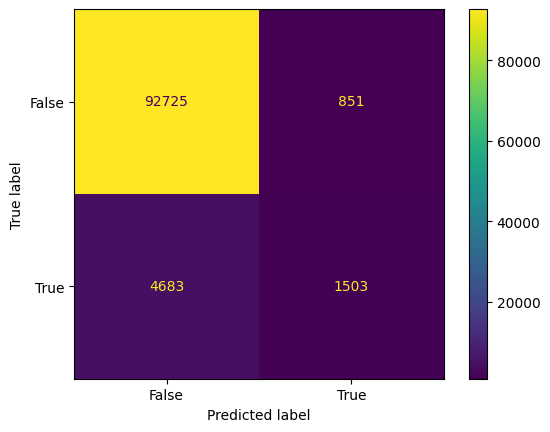

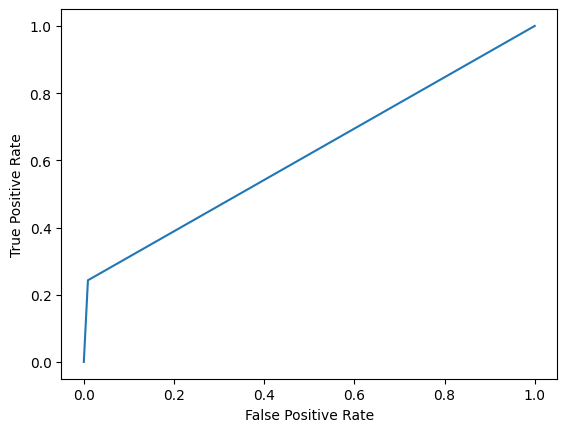

In [24]:
clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
score(X_test, y_test, best_clf)

Resampled dataset shape Counter({0: 187141, 1: 187141})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.868918
Error Rate: 0.1310819751007397
Mean Recall: 0.7460952863140565
Balanced Accuracy Score: 0.7460952863140565
Precision: 0.6159782970656057
F-Score: 0.6456425929109053
99762 99762
Selectivity: 0.8863063178592802
G_mean: 0.8131844599998065


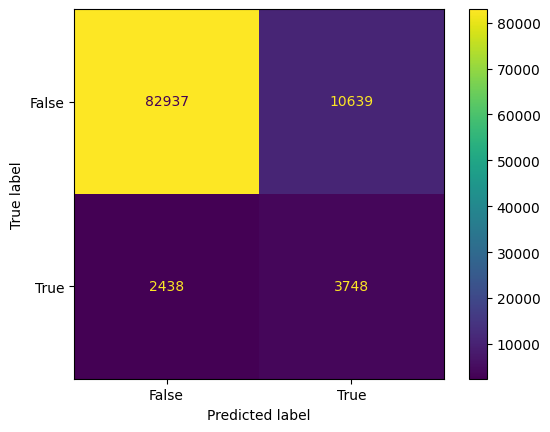

Resampled dataset shape Counter({0: 187141, 1: 187141})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.862834
Error Rate: 0.13716645616567436
Mean Recall: 0.7561371921157962
Balanced Accuracy Score: 0.7561371921157962
Precision: 0.6144529717325513
F-Score: 0.6438004565171456
99762 99762
Selectivity: 0.8779387877233479
G_mean: 0.8147651009945618


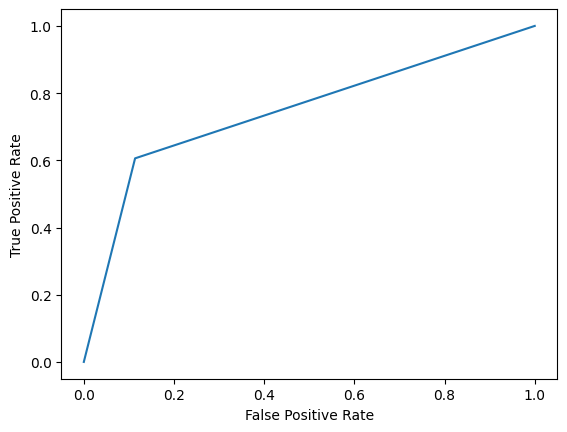

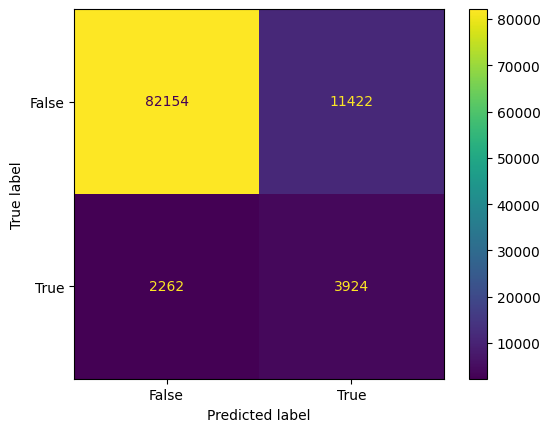

Resampled dataset shape Counter({0: 187141, 1: 187141})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.858754
Error Rate: 0.141246165874782
Mean Recall: 0.7615864161245056
Balanced Accuracy Score: 0.7615864161245056
Precision: 0.6132432897290834
F-Score: 0.6420703015920534
99762 99762
Selectivity: 0.8725100453107635
G_mean: 0.8151636635920755


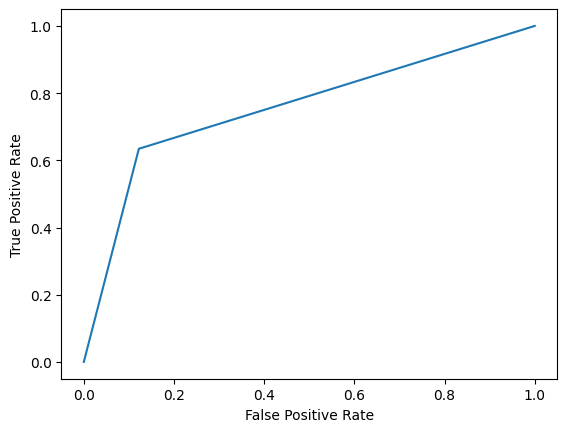

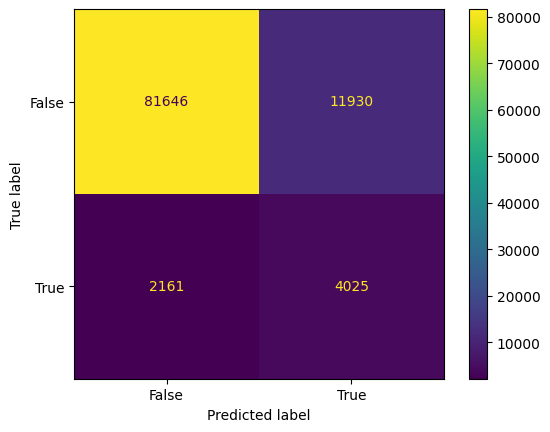

Resampled dataset shape Counter({0: 187141, 1: 187141})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.855847
Error Rate: 0.14415308434073093
Mean Recall: 0.765698205380988
Balanced Accuracy Score: 0.765698205380988
Precision: 0.6125271758004825
F-Score: 0.6409311949516211
99762 99762
Selectivity: 0.8686094725143199
G_mean: 0.8155321663068485


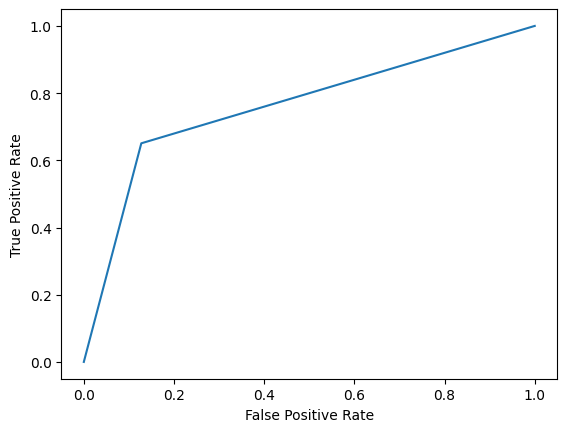

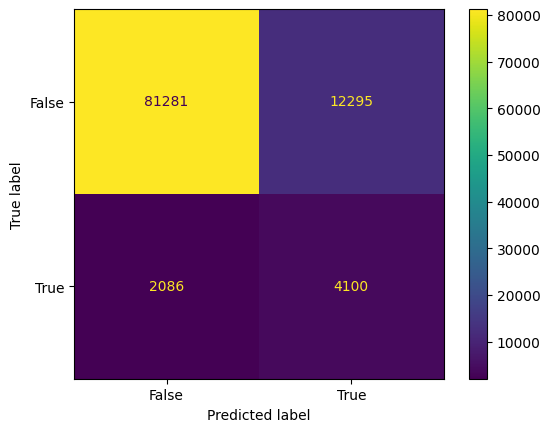

Resampled dataset shape Counter({0: 187141, 1: 187141})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.855757
Error Rate: 0.14424329905174316
Mean Recall: 0.771084994726611
Balanced Accuracy Score: 0.771084994726611
Precision: 0.6139562005075532
F-Score: 0.6428156766700062
99762 99762
Selectivity: 0.8677438659485338
G_mean: 0.8179879426366713


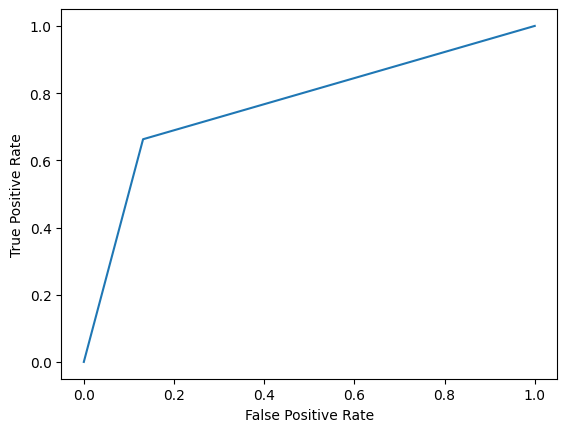

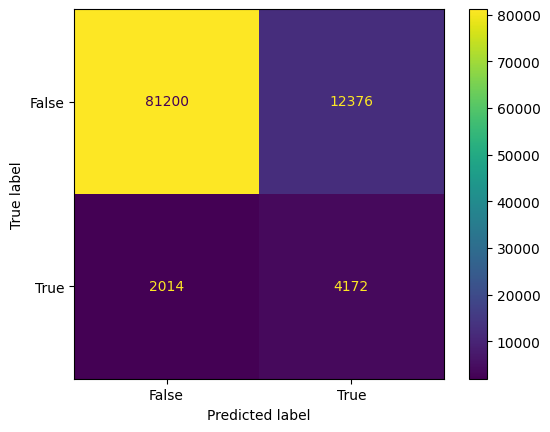

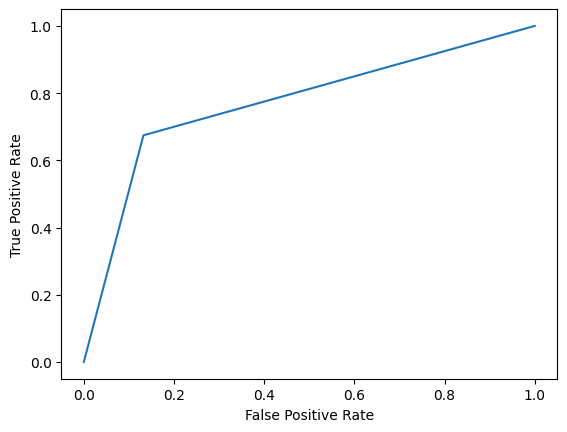

In [25]:
sm_list = []
from collections import Counter
for i in [3, 5, 7, 9, 11]:
    sm_list.append(SMOTE(random_state=42, k_neighbors=i))
for sm in sm_list:
    X_new, y_new = sm.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_new))
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.865460
Error Rate: 0.13454020568954106
Mean Recall: 0.7566313106223114
Balanced Accuracy Score: 0.7566313106223114
Precision: 0.6164569461757701
F-Score: 0.6464853214551375
99762 99762
Selectivity: 0.8808668889458836
G_mean: 0.8163892874523293


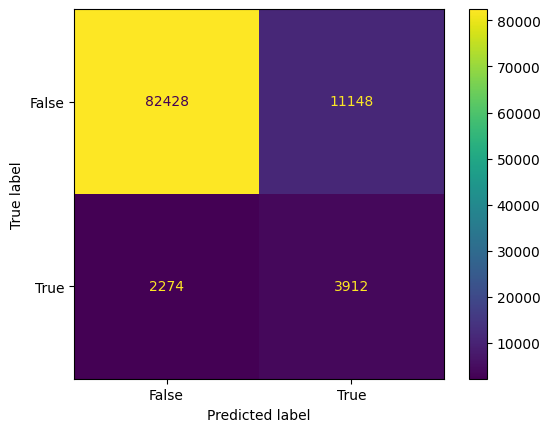

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.857100
Error Rate: 0.14290010224333916
Mean Recall: 0.7653848141568793
Balanced Accuracy Score: 0.7653848141568793
Precision: 0.6132341420896642
F-Score: 0.641961513284559
99762 99762
Selectivity: 0.8700842096264
G_mean: 0.8160571310182501


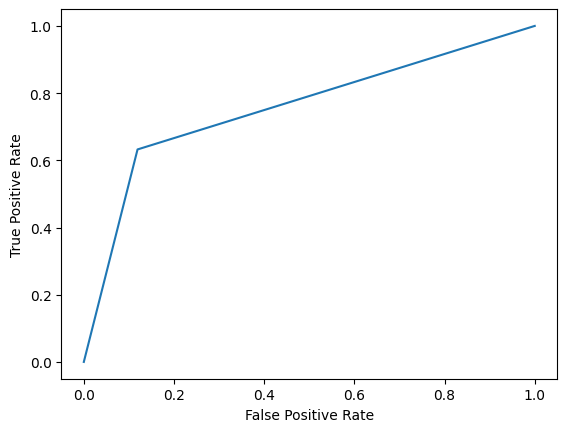

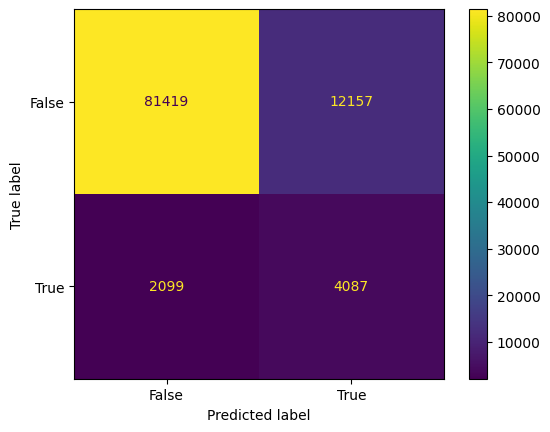

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.852699
Error Rate: 0.14730057536937913
Mean Recall: 0.7710404762775438
Balanced Accuracy Score: 0.7710404762775438
Precision: 0.6120646739033252
F-Score: 0.6400222291724875
99762 99762
Selectivity: 0.8642600666837651
G_mean: 0.8163207050194868


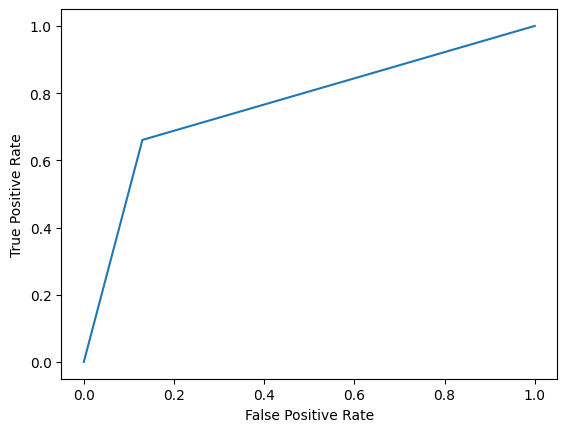

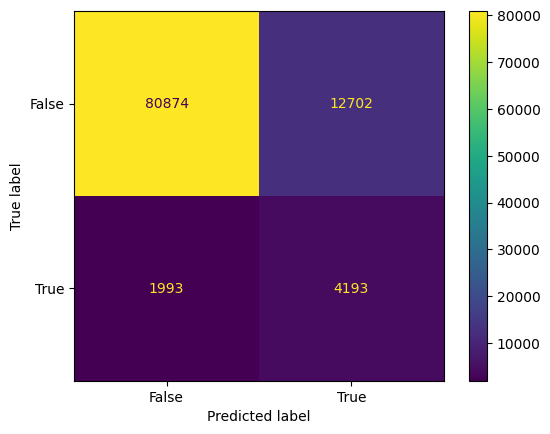

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.869489
Error Rate: 0.13051061526432906
Mean Recall: 0.7559108891359395
Balanced Accuracy Score: 0.7559108891359395
Precision: 0.6192637411979742
F-Score: 0.6501186219839967
99762 99762
Selectivity: 0.8855689493032401
G_mean: 0.8181755385361945


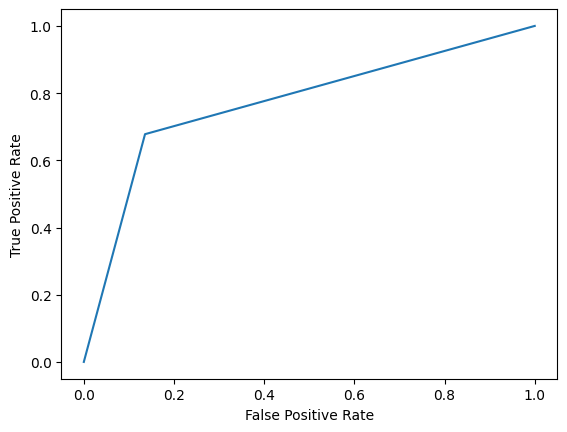

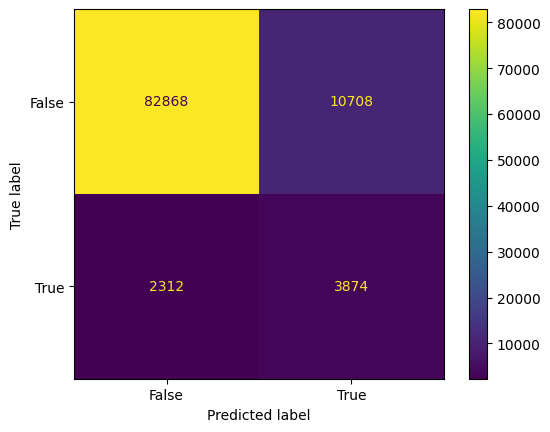

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.876276
Error Rate: 0.12372446422485517
Mean Recall: 0.7506211075120441
Balanced Accuracy Score: 0.7506211075120441
Precision: 0.6232785314886992
F-Score: 0.6548222177142419
99762 99762
Selectivity: 0.8940647174489186
G_mean: 0.8192092824174724


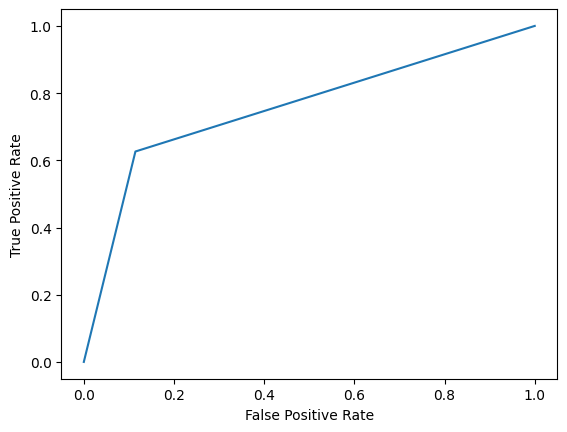

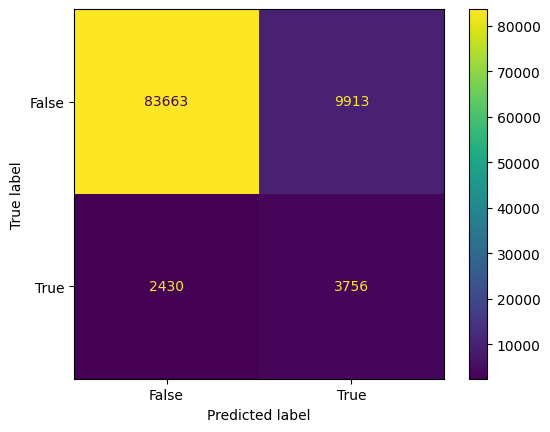

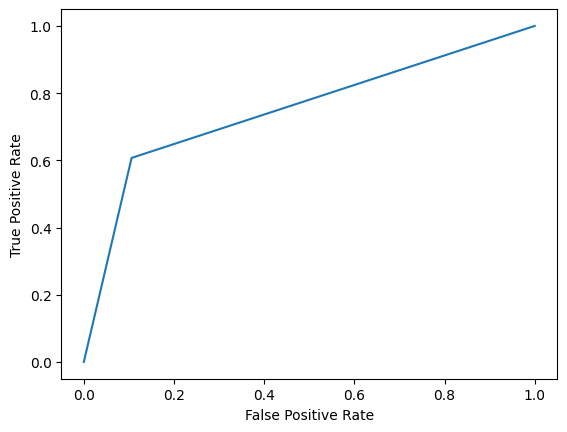

In [26]:
csm_list = []
for (i,j) in [(5,3), (7,3), (9,3), (7,5), (9,7)]:
    csm_list.append(CentroidSMOTE(k_neighbors=i, m_vertices=j))

for csm in csm_list:
    X_new, y_new = csm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)